# Kernel Support Vector Machine (SVM) Model

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import random
import counting_fns as cf

# List of all the months
months = ['2_June', '3_July', '4_August', '5_September', '6_October']

# Define the path to the data directory and columns to keep
data_path = "/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month"

## Randomized Months

In [4]:
# Randomly select 3 months for training set
# random.seed(350)
months_train = random.sample(months, 4)

# Print the months in the training set
print("Months in training set:", months_train)

# Create a list of remaining months for the test set
months_test = [month for month in months if month not in months_train]
# Print the months in the test set
print("Months in test set:", months_test)

Months in training set: ['3_July', '6_October', '2_June', '5_September']
Months in test set: ['4_August']


## Load Dataframes

### By Visit

In [6]:
# Filter Columns
filter = ['visit', 'gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', '#W', '#L', '#NH', '#D',
        'w/min', 'l/min', '#2ws', '2ws_profit', '2ws_wgramt','2ws/min', 
        '#3ws', '3ws_profit', '3ws_wgramt', '3ws/min', '#4ws', '4ws_profit', '4ws_wgramt', '4ws/min', 
        'w/g', 'l/g', 'nh/g', 'd/g', 'ave_time_per_gamble', 
        'min_time_per_gamble', 'max_time_per_gamble', 'total_gambles', 'total_duration',
        'machines_changes', 'unique_machines', 'ave_time_per_machine', 'classification']

# Load the datasets
datasets = cf.load_and_preprocess_datasets_ntop(months, data_path, 'visit', filter)

# Create training and test sets
dt_train = pd.concat([datasets['dtf'+month[1:]] for month in months_train])
dt_test = pd.concat([datasets['dtf'+month[1:]] for month in months_test])

# # Seperate dependent and independent variables
X_train = dt_train.iloc[:, :-1].values
y_train = dt_train.iloc[:, -1].values
X_test = dt_test.iloc[:, :-1].values
y_test = dt_test.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X_train[:, 0] = le.fit_transform(X_train[:, 0])
X_test[:, 0] = le.fit_transform(X_test[:, 0])


# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# # Feature Scaling
sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[10632    42]
 [  781   443]]
Accuracy:  0.9308287107076819
Precision:  0.9224856624883362
Recall:  0.678996654873304
F1 Score:  0.7405850469033266


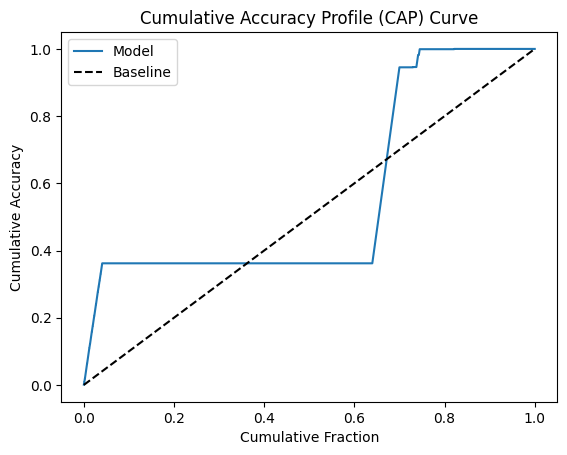

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()

### By Session

In [8]:
# Filter Columns
filter = ['session_time', 'gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', '#W', '#L', '#NH', '#D',
        'w/min', 'l/min', '#2ws', '2ws_profit', '2ws_wgramt','2ws/min', 
        '#3ws', '3ws_profit', '3ws_wgramt', '3ws/min', '#4ws', '4ws_profit', '4ws_wgramt', '4ws/min', 
        'w/g', 'l/g', 'nh/g', 'd/g', 'ave_time_per_gamble', 
        'min_time_per_gamble', 'max_time_per_gamble', 'total_gambles', 'total_duration',
        'machines_changes', 'unique_machines', 'ave_time_per_machine', 'classification']

# Load the datasets
datasets = cf.load_and_preprocess_datasets_ntop(months, data_path, 'session', filter)

# Create training and test sets
dt_train = pd.concat([datasets['dtf'+month[1:]] for month in months_train])
dt_test = pd.concat([datasets['dtf'+month[1:]] for month in months_test])

# # Seperate dependent and independent variables
X_train = dt_train.iloc[:, :-1].values
y_train = dt_train.iloc[:, -1].values
X_test = dt_test.iloc[:, :-1].values
y_test = dt_test.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X_train[:, 0] = le.fit_transform(X_train[:, 0])
X_test[:, 0] = le.fit_transform(X_test[:, 0])


# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# # Feature Scaling
sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[10652    54]
 [  519   775]]
Accuracy:  0.95225
Precision:  0.9442008479002639
Recall:  0.7969370914228281
F1 Score:  0.851953512800154


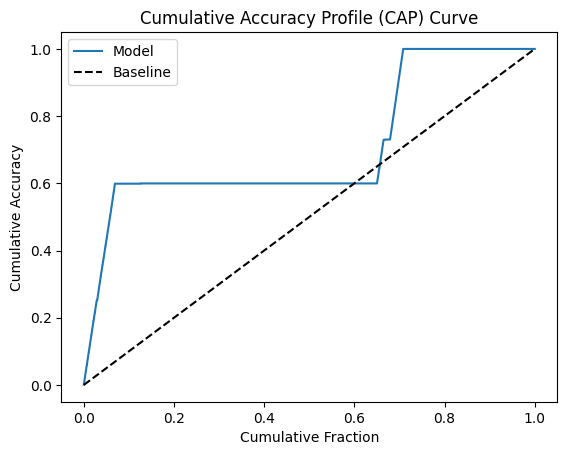

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()